In [1]:
# get node, edge and cell data

import sys
sys.path.insert(0, '../cell_soap/')
import cell_describe
node = cell_describe.node
edge = cell_describe.edge
cell = cell_describe.cell
colony = cell_describe.colony

nodes = [node((250, 290)), #n_a, loc0
         node((343, 424)), #n_b, loc1
         node((520, 249)), #n_c, loc2
         node((321, 108)), #n_d, loc3
         node(( 92,  34)), #n_e, loc4
         node(( 42, 246)), #n_f, loc5
         node(( 83, 446))] #n_g, loc6

edges = [edge(nodes[1], nodes[0],  None), #m_ba, loc0
         edge(nodes[2], nodes[1],  500), #m_cb, loc1
         edge(nodes[2], nodes[3],  400), #m_cd, loc2
         edge(nodes[0], nodes[3],  300), #m_ad, loc3
         edge(nodes[5], nodes[0],  900), #m_fa, loc4
         edge(nodes[5], nodes[4],  200), #m_fe, loc5
         edge(nodes[3], nodes[4],  300), #m_de, loc6
         edge(nodes[5], nodes[6], 1000), #m_fg, loc7
         edge(nodes[6], nodes[1], 1000)] #m_gb, loc8

cell_a_nodes = [nodes[0], #n_a
                nodes[1], #n_b
                nodes[6], #n_g
                nodes[5]] #n_f
cell_a_edges = [edges[0], #m_ba
                edges[8], #m_gb
                edges[7], #m_fg
                edges[4]] #m_fa

cell_b_nodes = [nodes[0], #n_a
                nodes[3], #n_d
                nodes[2], #n_c
                nodes[1]] #n_b
cell_b_edges = [edges[3], #m_ad
                edges[2], #m_cd
                edges[1], #m_cb
                edges[0]] #m_ba
                
cell_c_nodes = [nodes[4], #n_e
                nodes[3], #n_d
                nodes[0], #n_a
                nodes[5]] #n_f
cell_c_edges = [edges[6], #m_de
                edges[3], #m_ad
                edges[4], #m_fa
                edges[5]] #m_fe

# Create cells
cells = [cell(cell_a_nodes, cell_a_edges),
         cell(cell_b_nodes, cell_b_edges), 
         cell(cell_c_nodes, cell_c_edges)]



In [2]:
# define a colony 
col1 = colony(cells[0:2])

In [3]:
# calculate tensions along every edge
tensions = col1.calculate_tension()
print(edges[0].tension)


[0.5328849725636896]


[(0, 460), (0, 540), None]

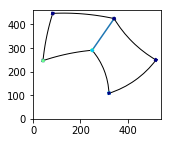

In [7]:
# plot tensions

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np


edges2 = col1.edges
nodes2 = col1.nodes
fig, ax = plt.subplots(1,1,figsize=(12,2))

min_t = min(tensions)
max_t = max(tensions)
width = max_t - min_t
colors = (tensions - min_t)/width


for j, an_edge in enumerate(edges2):
    an_edge.plot(ax)
    vectors = an_edge.unit_vectors()
    a, b = an_edge.node_a.loc, an_edge.node_b.loc
    for n,v in zip((a,b), vectors):
        ax.plot([n[0], v[0]+n[0]], [n[1], v[1]+n[1]], c=cm.jet(colors[j]), lw = 3 )
ax.set(xlim=[0,540], ylim=[0, 460], aspect = 1)

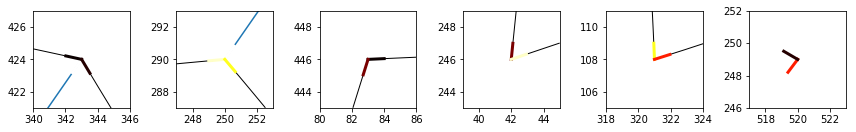

In [5]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np


edges2 = col1.edges
nodes2 = col1.nodes
fig, axes = plt.subplots(1,len(nodes2),figsize=(12,2))

for ax in axes:
    for j, an_edge in enumerate(edges2):

        an_edge.plot(ax)
        vectors = an_edge.unit_vectors()
        a, b = an_edge.node_a.loc, an_edge.node_b.loc
        for n,v in zip((a,b), vectors):
            ax.plot([n[0], v[0]+n[0]], [n[1], v[1]+n[1]], c=cm.hot(colors[j]), lw = 3 )
#             ax.set(xlim=[0,540], ylim=[0, 460], aspect = 1)
            
for ax, an_node in zip(axes, nodes2):
    x,y = an_node.loc
    ax.set(xlim=[x-3, x+3], ylim=[y-3,y+3], aspect=1)    
plt.tight_layout()





In [ ]:
numpy linalg.lstsq #least square solver

Testing

In [1]:
import sys
sys.path.insert(0, '../cell_soap/')
import cell_describe
node = cell_describe.node
edge = cell_describe.edge
cell = cell_describe.cell
colony = cell_describe.colony

nodes = [node((250, 290)), #n_a, loc0
         node((343, 424)), #n_b, loc1
         node((520, 249)), #n_c, loc2
         node((321, 108)), #n_d, loc3
         node(( 92,  34)), #n_e, loc4
         node(( 42, 246)), #n_f, loc5
         node(( 83, 446))] #n_g, loc6

edges = [edge(nodes[1], nodes[0],  None), #m_ba, loc0
         edge(nodes[2], nodes[1],  None), #m_cb, loc1
         edge(nodes[2], nodes[3],  None), #m_cd, loc2
         edge(nodes[0], nodes[3],  None), #m_ad, loc3
         edge(nodes[5], nodes[0],  None), #m_fa, loc4
         edge(nodes[5], nodes[4],  None), #m_fe, loc5
         edge(nodes[3], nodes[4], None), #m_de, loc6
         edge(nodes[5], nodes[6], None), #m_fg, loc7
         edge(nodes[6], nodes[1], None)] #m_gb, loc8

cell_a_nodes = [nodes[0], #n_a
                nodes[1], #n_b
                nodes[6], #n_g
                nodes[5]] #n_f
cell_a_edges = [edges[0], #m_ba
                edges[8], #m_gb
                edges[7], #m_fg
                edges[4]] #m_fa

cell_b_nodes = [nodes[0], #n_a
                nodes[3], #n_d
                nodes[2], #n_c
                nodes[1]] #n_b
cell_b_edges = [edges[3], #m_ad
                edges[2], #m_cd
                edges[1], #m_cb
                edges[0]] #m_ba
                
cell_c_nodes = [nodes[4], #n_e
                nodes[3], #n_d
                nodes[0], #n_a
                nodes[5]] #n_f
cell_c_edges = [edges[6], #m_de
                edges[3], #m_ad
                edges[4], #m_fa
                edges[5]] #m_fe

# Create cells
cells = [cell(cell_a_nodes, cell_a_edges),
         cell(cell_b_nodes, cell_b_edges), 
         cell(cell_c_nodes, cell_c_edges)]

In [8]:
col1 = colony(cells[0:3])
tensions = col1.calculate_tension()
print(edges[0].tension)

[0.5992653794502539, 0.5543013369896792]


[(0, 460), (0, 540), None]

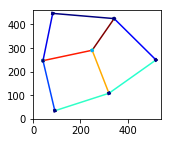

In [7]:
# plot tensions

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np


edges2 = col1.edges
nodes2 = col1.nodes
fig, ax = plt.subplots(1,1,figsize=(12,2))

min_t = min(tensions)
max_t = max(tensions)
width = max_t - min_t
colors = (tensions - min_t)/width



for j, an_edge in enumerate(edges2):
    an_edge.plot(ax, c=cm.jet(colors[j]))
    vectors = an_edge.unit_vectors()
    a, b = an_edge.node_a.loc, an_edge.node_b.loc
    for n,v in zip((a,b), vectors):
        ax.plot([n[0], v[0]+n[0]], [n[1], v[1]+n[1]], c=cm.jet(colors[j]), lw = 3 )
ax.set(xlim=[0,540], ylim=[0, 460], aspect = 1)

1.0
2.0
3.0
4.0


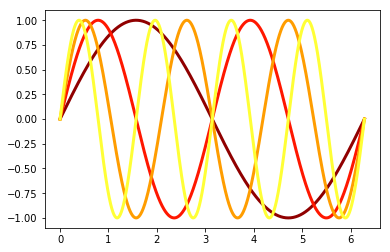

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# some fake data:
x = np.linspace(0, 2*np.pi, 1000)
fs = np.arange(1, 5.)
ys = np.sin(x*fs[:, None])


for y, f in zip(ys, fs):
    print(f)
    plt.plot(x, y, lw=3, c=cm.hot(f/5))

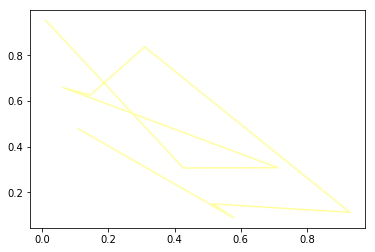

In [20]:
# Generate data...
from matplotlib import cm
import numpy as np
x = np.random.random(10)
y = np.random.random(10)

# Plot...
plt.plot(x, y, c=cm.hot(0.9))


In [30]:
print(f)

4.0


6
7


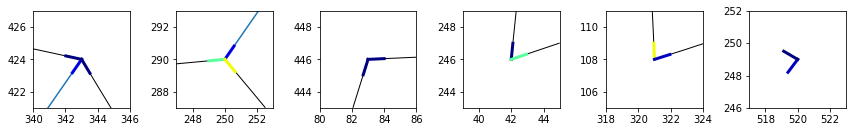

More Testing after this line

In [57]:
# A = np.array([[-1, 0.2, 0.9],[0.3, -0.4, 0.6], [1, 0.4, 0.6]])
A = np.array([[-1, 0.2],[0.3, -0.4], [1, 0.4]])
A

array([[-1. ,  0.2],
       [ 0.3, -0.4],
       [ 1. ,  0.4]])

In [58]:
y = np.array([0.4, 0.5, 0.7])

In [59]:
y

array([0.4, 0.5, 0.7])

In [60]:
m = np.linalg.lstsq(A, y, rcond = None)[0]

In [61]:
m

array([0.2, 0.4])

In [64]:
nodes[0].edges

In [6]:
edges = col1.edges
print(edges)

[<cell_describe.edge object at 0x109c99c50>, <cell_describe.edge object at 0x10bd9c2e8>, <cell_describe.edge object at 0x10bd9c2b0>, <cell_describe.edge object at 0x10bd9c710>, <cell_describe.edge object at 0x10bd9c208>, <cell_describe.edge object at 0x10bd9c240>, <cell_describe.edge object at 0x10b7a9278>]


In [16]:
indices = np.array([edges.index(x) for x in nodes[3].edges if x in edges])
vectors = np.array([x[0] for x in nodes[3].tension_vectors if nodes[3].edges[nodes[3].tension_vectors.index(x)] in edges])
# horizontal_vectors = np.array([x[0] for x in nodes[3].tension_vectors if [True for i ]])

In [17]:
print(indices)
print(vectors)


[5 4]
[ 0.95335223 -0.04029669]


In [28]:
if [True for i in nodes[3].edges if i in edges]:
    print('why')

why


In [25]:
nodes[3].edges[0]

In [47]:
col1
self = col1

In [79]:

nodes = self.nodes
edges = self.edges

# solve y = Ax
# initialize A
A = np.zeros((len(edges), 1))
y = np.zeros(len(edges))
b = np.zeros(len(edges))

for node in nodes:
    b = np.zeros(len(edges))
    # node.edges should give the same edge as the edge corresponding to node.tension_vectors since they are added together
    # only want to add indices of edges that are part of colony edge list
    indices = np.array([edges.index(x) for x in node.edges if x in edges])

    # only want to consider horizontal vectors that are a part of the colony edge list 
    horizontal_vectors = np.array([x[0] for x in node.tension_vectors if node.edges[node.tension_vectors.index(x)] in edges])
    b[indices] =horizontal_vectors
    A = np.append(A, b[np.newaxis].T, axis=1)


    vertical_vectors = np.array([x[1] for x in node.tension_vectors if node.edges[node.tension_vectors.index(x)] in edges])
    b[indices] =vertical_vectors
    A = np.append(A, b[np.newaxis].T, axis=1)

#tensions = np.linalg.solve(A, B) # doesnt work for homogenous system
#tensions = solution(A)
tensions= np.linalg.lstsq(A, y, rcond = None)[0]

In [92]:
print(np.shape(A))
print(np.shape)
print(np.shape(y))
tensions = np.linalg.lstsq(A[:, 0:6], y, rcond = None)[0]

(7, 13)
<function shape at 0x10aa351e0>
(7,)


In [93]:
print(tensions)

[0. 0. 0. 0. 0. 0.]


In [95]:
A[1,:]

array([ 0.        ,  0.        ,  0.        , -0.97692264,  0.21359345,
        0.99892264,  0.04640655,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [38]:
tr[:,:-1] = f.T

In [39]:
tr

array([[0.],
       [0.],
       [0.],
       [0.]])

In [40]:
tr[:,:-1] = f.T

In [41]:
tr

array([[0.],
       [0.],
       [0.],
       [0.]])

In [43]:
tr = np.append(tr, f.T, axis=1)

In [44]:
tr

array([[0. , 0.1],
       [0. , 0.2],
       [0. , 0.3],
       [0. , 0.4]])

In [45]:
tr = np.append(tr, f.T, axis=1)

In [96]:
self = col1

In [101]:
from useful_functions import solution
nodes = self.nodes
edges = self.edges

# solve AX = B
# initialize A
A = np.zeros((len(edges), len(edges)))

j = 0

for node in nodes:

    if j < len(edges):

        # node.edges should give the same edge as the edge corresponding to node.tension_vectors since they are added together
        # only want to add indices of edges that are part of the edges of the colony
        indices = np.array([edges.index(x) for x in node.edges if x in edges])
        # only want to consider horizontal vectors that are a part of the colony edge list 
        horizontal_vectors = np.array([x[0] for x in node.tension_vectors if node.edges[node.tension_vectors.index(x)] in edges])

        A[j, indices] = horizontal_vectors
        print(j)
        j +=1

if j < len(edges):
    for node in nodes:
        if j < len(edges):
            indices = np.array([edges.index(x) for x in node.edges if x in edges])
            vertical_vectors = np.array([x[1] for x in node.tension_vectors if node.edges[node.tension_vectors.index(x)] in edges])
            A[j,indices] = vertical_vectors
            j += 1

#tensions = np.linalg.solve(A, B) # doesnt work for homogenous system
tensions = solution(A)

0
1
2
3
4
5


In [102]:
tensions

array([ 0.17165444, -0.21420433, -0.93751405,  0.14600889,  0.13162498,
        0.03559452, -0.07620996])

In [142]:
# generating a random overdetermined system
import numpy as np
A = np.random.rand(5,5)
b = np.random.rand(5,1) 
b = np.zeros((5,1))

x_lstsq = np.linalg.lstsq(A,b, rcond = None)[0] # computing the numpy solution

Q,R = np.linalg.qr(A) # qr decomposition of A
Qb = np.dot(Q.T,b) # computing Q^T*b (project b onto the range of A)
x_qr = np.linalg.solve(R,Qb) # solving R*x = Q^T*b

# comparing the solutions
print('qr solution')
print(x_qr)
print('lstqs solution')
print(x_lstsq)

qr solution
[[-0.]
 [ 0.]
 [-0.]
 [ 0.]
 [-0.]]
lstqs solution
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [143]:
from scipy.sparse.linalg import lsqr

In [144]:
lsqr(A, b, damp=0.0, atol=1e-08, btol=1e-08, conlim=100000000.0, iter_lim=None, show=False, calc_var=False)[0]

The exact solution is  x = 0                              


array([0., 0., 0., 0., 0.])

In [187]:
a = np.random.randn(4, 3) 

In [188]:
a

array([[-0.70734869, -1.66793521,  1.91476961],
       [-0.47973195,  0.32129656, -1.08589387],
       [ 0.2821073 ,  1.90382654, -0.40226756],
       [ 1.5344177 , -0.94977052, -0.98745211]])

In [189]:
U, s, Vh = np.linalg.svd(a)

In [190]:
Vh

array([[ 0.2298921 ,  0.71809847, -0.65687457],
       [-0.63661812,  0.62147752,  0.45659946],
       [-0.73611615, -0.31320964, -0.60002727]])

In [191]:
s

array([3.24481659, 2.19715653, 1.09655073])

In [192]:
np.diag(s)

array([[3.24481659, 0.        , 0.        ],
       [0.        , 2.19715653, 0.        ],
       [0.        , 0.        , 1.09655073]])

In [174]:
s2 = np.linalg.svd(a, compute_uv=False)

In [175]:
s2

array([2.55193521, 2.08307588, 0.55388028])

In [240]:
import scipy as sp
A = np.array([[1,0,0], [0,1,0]])

U, S,V = sp.linalg.svd(A)
SS = np.zeros((len(A[:,1]),len(A[1,:])))
# SS = sp.diag(S)
SS.diagonal() 
np.fill_diagonal(SS.T, S)
print(S)

[1. 1.]


In [236]:
np.dot(A, SS[-1])

array([0., 1.])

In [237]:
SS[-1]

array([0., 1., 0.])

In [196]:
U

array([[1., 0.],
       [0., 1.]])

In [197]:
S

array([1., 1.])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [208]:
SS = np.diag(S)
print(SS)

[[1. 0.]
 [0. 1.]]


In [205]:
np.dot(A,SS[-1])

ValueError: shapes (2,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

In [265]:
A = np.ones((4,3))

In [269]:
# A[3,:] = [4,2,3,0.4]
A

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [267]:
U, S,V = sp.linalg.svd(A)

In [283]:
print(V)
print(V.T)

[[-0.57735027 -0.57735027 -0.57735027]
 [-0.81649658  0.40824829  0.40824829]
 [-0.          0.70710678 -0.70710678]]
[[-0.57735027 -0.81649658 -0.        ]
 [-0.57735027  0.40824829  0.70710678]
 [-0.57735027  0.40824829 -0.70710678]]


In [284]:
print(V.T[:,-1])
print(V.T[:,-2])
print(V.T[:,-3])
print(V.T[:,-4])

[-0.          0.70710678 -0.70710678]
[-0.81649658  0.40824829  0.40824829]
[-0.57735027 -0.57735027 -0.57735027]


IndexError: index -4 is out of bounds for axis 1 with size 3

In [285]:
def svdsolve(a,b):
    import numpy as np
    u,s,v = np.linalg.svd(a)
    c = np.dot(u.T,b)
    w = np.linalg.solve(np.diag(s),c)
    x = np.dot(v.T,w)
    return x

In [288]:
B = np.zeros((4,1))
B

array([[0.],
       [0.],
       [0.],
       [0.]])

In [294]:
A = np.ones((4,5))
svdsolve(A, B)

LinAlgError: Singular matrix

In [296]:
intercept = -10
slope = 3
npts = 50
noise = 80
xs = 10 + np.random.rand(npts, 1) * 90;
ys = slope * xs + intercept + np.random.rand(npts, 1) * noise;

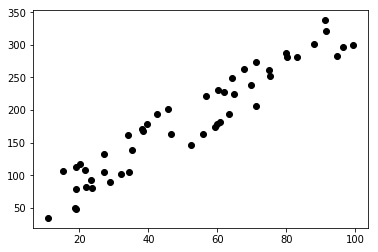

In [299]:
import matplotlib.pyplot as plt
plt.plot(xs, ys, 'ok')

In [302]:
A = xs
A = np.append(A, ys, axis=1)
A = np.append(A, np.ones((npts,1)), axis=1)

TypeError: data type not understood

In [315]:

[U, S, V] = np.linalg.svd(A)

In [368]:
S


array([1474.76920607,   54.1253344 ,    2.76687671])

In [348]:
V.T[:,-2]

array([ 0.96203805, -0.27269967, -0.01084772])

In [351]:
fit = V.T[:, -3]
a = fit[0]
b = fit[1]
c = fit[2]

In [352]:
slope_est = -a / b
intercept_est = c / b

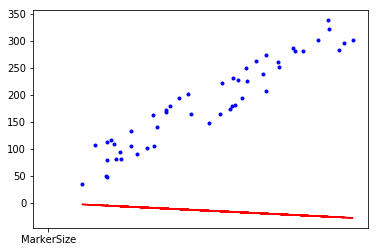

In [353]:
fig, ax = plt.subplots(1,1)
ys_est = slope_est * xs + intercept_est;
plt.plot(xs, ys, 'b.', 'MarkerSize', 5);

plt.plot(xs, ys_est, 'r-')
plt.show()

In [366]:
a = [1,2,3]
a[-2]

2

In [405]:
A = np.random.rand(4,3)

In [406]:
A

array([[0.76331104, 0.21994683, 0.80963732],
       [0.35125526, 0.17476286, 0.32318003],
       [0.44314112, 0.93743829, 0.46130301],
       [0.8516102 , 0.91703963, 0.85416357]])

In [407]:
U, S, V = np.linalg.svd(A)

In [408]:
S

array([2.17635999, 0.62526524, 0.03410653])

In [402]:
x = V[-1,:]
y = V.T[:,-1]

In [403]:
print(x)
print(y)

[-0.68521892 -0.11479865  0.71923313]
[-0.68521892 -0.11479865  0.71923313]


In [404]:
np.dot(A, x)

array([ 0.00577564, -0.00919152, -0.01403139,  0.01179574])

In [418]:
A[1,:] = A[0,:]
A[2,:] = A[3,:]

In [419]:
A

array([[0.76331104, 0.21994683, 0.80963732],
       [0.76331104, 0.21994683, 0.80963732],
       [0.8516102 , 0.91703963, 0.85416357],
       [0.8516102 , 0.91703963, 0.85416357]])

In [420]:
U, S, V = np.linalg.svd(A)

In [421]:
S

array([2.61338058e+00, 5.78707063e-01, 7.36467166e-17])

In [422]:
x = V[-1,:]
y = V.T[:,-1]
np.dot(A, x)

array([-1.11022302e-16, -1.11022302e-16, -1.11022302e-16, -1.11022302e-16])

In [423]:
x

array([ 0.73341128, -0.0495945 , -0.67797366])

In [424]:
y

array([ 0.73341128, -0.0495945 , -0.67797366])

In [430]:
A = np.zeros((5,1))

In [431]:
A

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [436]:
B = np.array([0,1,2,3,4])[np.newaxis]
C = np.append(A, B.T, axis=1)

In [440]:
C = C.T

In [441]:
C

array([[0., 0., 0., 0., 0.],
       [0., 1., 2., 3., 4.]])

In [442]:
C = C.T

In [443]:
C

array([[0., 0.],
       [0., 1.],
       [0., 2.],
       [0., 3.],
       [0., 4.]])

In [444]:
col1

In [446]:
self = col1

In [467]:
nodes = self.nodes
edges = self.edges

# solve y = Ax
# initialize A
A = np.zeros((len(edges), 1))
y = np.zeros(len(edges))


for node in nodes:
    # node.edges should give the same edge as the edge corresponding to node.tension_vectors since they are added together
    # only want to add indices of edges that are part of colony edge list
    temp = np.zeros((len(edges),1))
    indices = np.array([edges.index(x) for x in node.edges if x in edges])
    # only want to consider horizontal vectors that are a part of the colony edge list 
    horizontal_vectors = np.array([x[0] for x in node.tension_vectors if node.edges[node.tension_vectors.index(x)] in edges])[np.newaxis]
    temp[indices] = horizontal_vectors.T
    A = np.append(A, temp, axis=1)
    temp = np.zeros((len(edges),1))
    vertical_vectors = np.array([x[1] for x in node.tension_vectors if node.edges[node.tension_vectors.index(x)] in edges])[np.newaxis]
    temp[indices] = vertical_vectors.T
    A = np.append(A, temp, axis=1)

A = A.T
U, S, V = np.linalg.svd(A)
tensions = V.T[:,-1]

In [468]:
tensions

array([ 0.53288497, -0.41780452, -0.25827995,  0.47798046,  0.31791743,
       -0.02991689, -0.37991133])

In [11]:
import numpy as np
b = [2,2]
a = [0,0]

center = 0.5*np.subtract(b, a)+a # midpoint
perp_a = np.array((a[0]-center[0], (a[1]-center[1])))
# np.seterr(divide='ignore', invalid='ignore')
# perp_a = perp_a/np.linalg.norm(perp_a)
perp_b = np.array(((b[0]-center[0]), b[1]-center[1]))
# np.seterr(divide='ignore', invalid='ignore')
# perp_b = perp_b/np.linalg.norm(perp_b)

In [12]:
perp_a

array([-1., -1.])

In [13]:
center

array([1., 1.])

In [14]:
perp_b

array([1., 1.])

In [15]:
np.cross(perp_a, perp_b)

array(0.)

In [22]:
vec = np.array([-1, -2.5])

In [23]:
np.cross(perp_a, vec)

array(1.5)